In [ ]:
Deviation

In [ ]:
Diverging bar

In [2]:
import matplotlib.pyplot as plt
import warnings


In [25]:
import pandas as pd
import numpy as np

drange = pd.date_range(start='2015-07-01', end='2015-07-10', freq='D')
df = pd.DataFrame(data=np.random.random_sample((10, 1)), index=drange, columns=['col1']).reset_index()
df.col1 = df.col1 -0.5
df["color"] = 'red'
columns = list(df.columns)
columns[0] = "date"

df.columns= columns

df.loc[df['col1'] > 0, 'color'] = 'blue'  
df

,date,col1,color
0,2015-07-01,-0.285834,red
1,2015-07-02,-0.046477,red
2,2015-07-03,-0.245969,red
3,2015-07-04,0.385355,blue
4,2015-07-05,-0.486950,red
5,2015-07-06,0.294025,blue
6,2015-07-07,0.239293,blue
7,2015-07-08,0.485373,blue
8,2015-07-09,0.426931,blue
9,2015-07-10,-0.290094,red


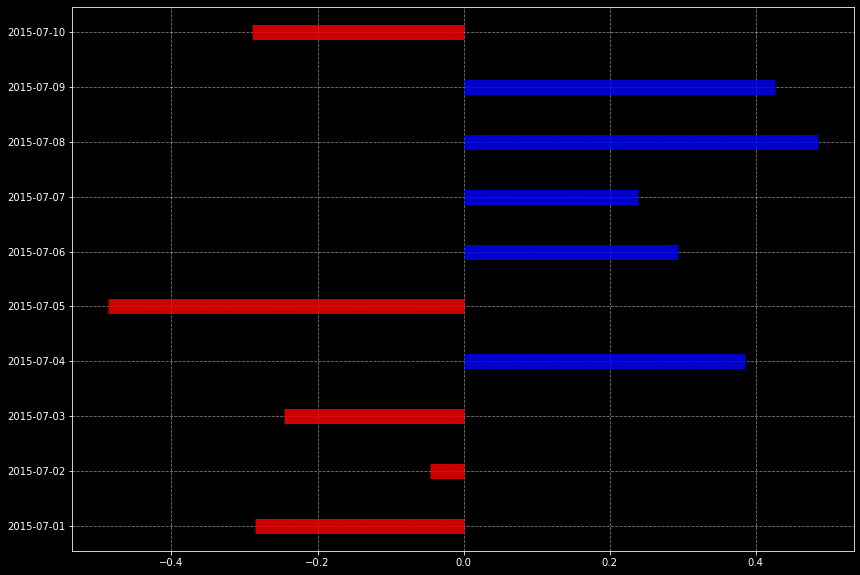

In [35]:
# Draw plot
plt.figure(figsize=(14, 10))
  
# Plotting the horizontal lines
plt.hlines(y=df.date, xmin=-0, xmax=df.col1,
           color=df.color, alpha=0.8, linewidth=15)
plt.grid(linestyle='--', alpha=0.5)
  
# Displaying the Diverging Bar Chart
plt.show()

In [ ]:
Diverging stacked bar

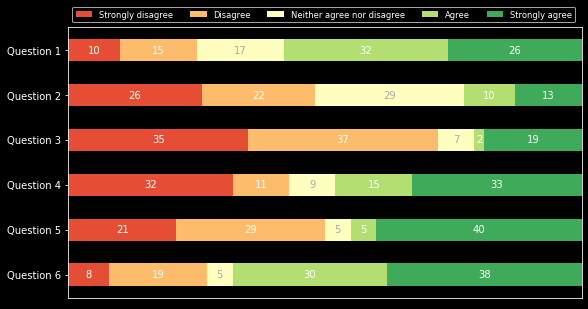

In [36]:
import numpy as np
import matplotlib.pyplot as plt


category_names = ['Strongly disagree', 'Disagree',
                  'Neither agree nor disagree', 'Agree', 'Strongly agree']
results = {
    'Question 1': [10, 15, 17, 32, 26],
    'Question 2': [26, 22, 29, 10, 13],
    'Question 3': [35, 37, 7, 2, 19],
    'Question 4': [32, 11, 9, 15, 33],
    'Question 5': [21, 29, 5, 5, 40],
    'Question 6': [8, 19, 5, 30, 38]
}


def survey(results, category_names):
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


plt.show()

(<Figure size 662.4x360 with 1 Axes>, <AxesSubplot:>)

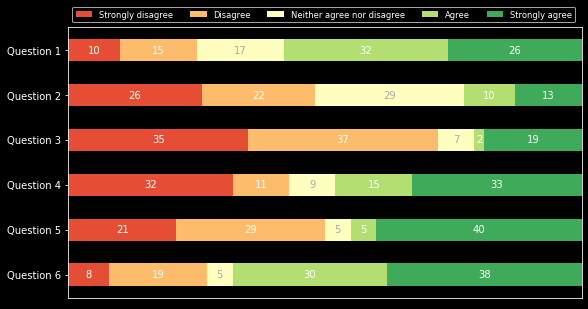

In [39]:
survey(results, category_names)

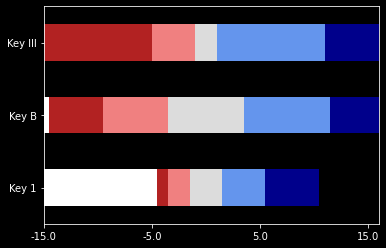

In [37]:
likert_colors = ['white', 'firebrick','lightcoral','gainsboro','cornflowerblue', 'darkblue']
dummy = pd.DataFrame([[1,2,3,4, 5], [5,6,7,8, 5], [10, 4, 2, 10, 5]],
                     columns=["SD", "D", "N", "A", "SA"],
                    index=["Key 1", "Key B", "Key III"])
middles = dummy[["SD", "D"]].sum(axis=1)+dummy["N"]*.5
longest = middles.max()
complete_longest = dummy.sum(axis=1).max()
dummy.insert(0, '', (middles - longest).abs())

dummy.plot.barh(stacked=True, color=likert_colors, edgecolor='none', legend=False)
z = plt.axvline(longest, linestyle='--', color='black', alpha=.5)
z.set_zorder(-1)

plt.xlim(0, complete_longest)
xvalues = range(0,complete_longest,10)
xlabels = [str(x-longest) for x in xvalues]
plt.xticks(xvalues, xlabels)
plt.show()

In [ ]:
spine

In [ ]:
surplus deficit filled line

In [102]:
drange = pd.date_range(start='2023-01-01', end='2023-02-27', freq='D')
np.random.seed(seed=10)
df = pd.DataFrame(data=np.random.random_sample((58, 1)), index=drange, columns=['col1'])
df.col1 = df.col1 -0.5
df["zero"] = 0
df = df.cumsum().reset_index()


columns = list(df.columns)
columns[0] = "date"

df.columns= columns


,date,col1,zero
0,2023-01-01,0.271321,0
1,2023-01-02,-0.207927,0
2,2023-01-03,-0.074279,0
3,2023-01-04,0.174525,0
4,2023-01-05,0.173032,0
5,2023-01-06,-0.102172,0
6,2023-01-07,-0.404109,0
7,2023-01-08,-0.143578,0
8,2023-01-09,-0.474467,0
9,2023-01-10,-0.886127,0


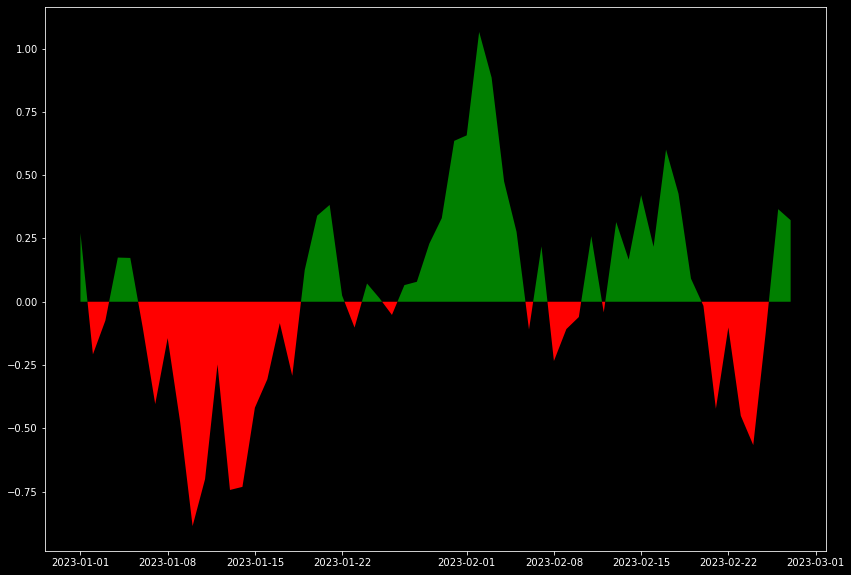

In [108]:
plt.figure(figsize=(14, 10))
ax = fig.add_axes([0,0,2,1])
plt.plot(df.date, df.col1, df.date, df.zero, color='blue', linewidth=0)
plt.fill_between(df.date, df.col1, df.zero, where=df.zero >= df.col1, facecolor='red', interpolate=True)
plt.fill_between(df.date, df.col1, df.zero, where=df.zero < df.col1, facecolor='green', interpolate=True)
plt.show()

In [ ]:
Correlation

In [ ]:
scatterplot

In [109]:
column+ tome timline

SyntaxError: invalid syntax (<ipython-input-109-81af160dc563>, line 1)

,x,y
0,0.550798,0.708148
1,0.290905,0.510828
2,0.892947,0.896293
3,0.125585,0.207243
4,0.051467,0.440810
5,0.029876,0.456833
6,0.649144,0.278487
7,0.676255,0.590863
8,0.023982,0.558854


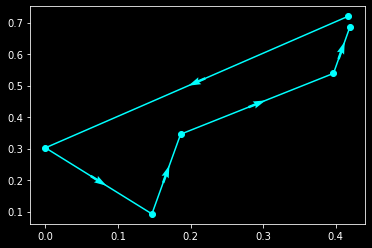

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(seed=1)
df = pd.DataFrame(data=np.random.random_sample((6, 2)), columns=['x', 'y'])

x = df['x'].values
y = df['y'].values

u = np.diff(x)
v = np.diff(y)
pos_x = x[:-1] + u/2
pos_y = y[:-1] + v/2
norm = np.sqrt(u**2+v**2) 

fig, ax = plt.subplots()
plt.figure(figsize=(14, 10))
ax.plot(x,y, marker="o", color="cyan")
ax.quiver(pos_x, pos_y, u/norm, v/norm, angles="xy", zorder=5, pivot="mid", color="cyan")
plt.show()

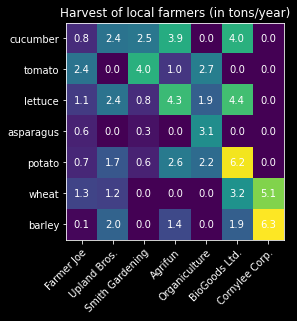

In [160]:
import numpy as np
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt

vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"]
farmers = [ "Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])
fig, ax = plt.subplots()
im = ax.imshow(harvest)

ax.set_xticks(np.arange(len(farmers))) # WAŻNE
ax.set_yticks(np.arange(len(vegetables))) # WAŻNE
ax.set_xticklabels(farmers)
ax.set_yticklabels(vegetables)


plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Harvest of local farmers (in tons/year)")
plt.show();

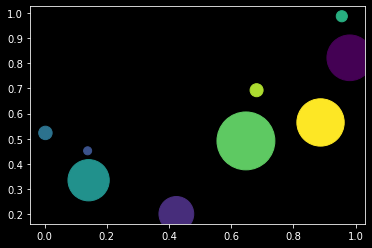

In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(seed=1113)
df = pd.DataFrame(data=np.random.random_sample((9, 3)), columns=['x', 'y', 's'])
df.reset_index()


fig, ax = plt.subplots()
ax.scatter(df.x,df.y, s=df.s*df.s*5000, marker="o", c=df.index);


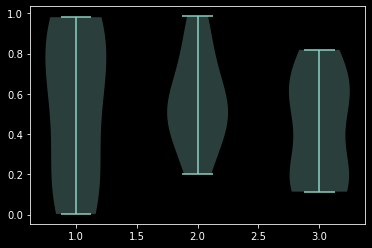

In [202]:
plt.violinplot(df );


ValueError: Unrecognized marker style '🧍'

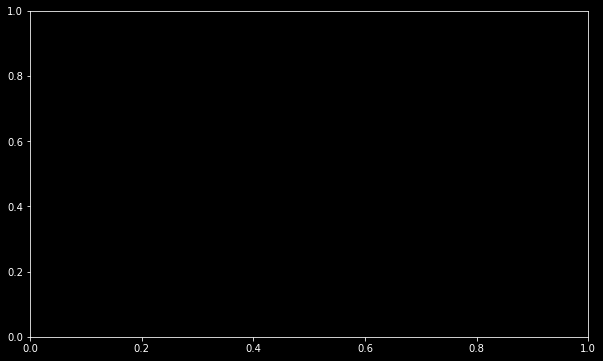

In [204]:

 
# defining a list of x and v values

x_values = [1, 2, 3, 4, 5]

y_values = [x*x for x in x_values]
 
# plotting the graph

fig, ax = plt.subplots(figsize=(10, 6))
 
# check that the marker value is given as
# '$U0001F601$'

ax.plot(x_values, y_values, marker='🧍', ms=20, c='green')

ax.set_title('Squared Values', fontsize=15)

ax.set_xlabel('Value')

ax.set_ylabel('Square of Value')
plt.show()

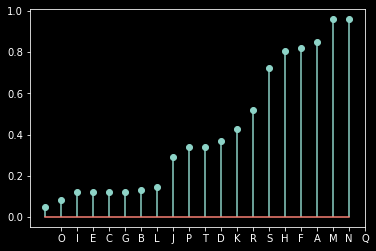

In [206]:
import pandas as pd
df = pd.DataFrame({'group':list(map(chr, range(65, 85))), 'values':np.random.uniform(size=20) })

# Reorder it following the values:
ordered_df = df.sort_values(by='values')
my_range=range(1,len(df.index)+1)

# Make the plot
plt.stem(ordered_df['values']);
plt.xticks( my_range, ordered_df['group']);

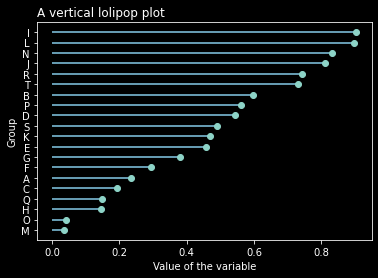

In [207]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
 
# Create a dataframe
df = pd.DataFrame({'group':list(map(chr, range(65, 85))), 'values':np.random.uniform(size=20) })
 
# Reorder it based on the values
ordered_df = df.sort_values(by='values')
my_range=range(1,len(df.index)+1)
 
# The horizontal plot is made using the hline function
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['values'], color='skyblue')
plt.plot(ordered_df['values'], my_range, "o")
 
# Add titles and axis names
plt.yticks(my_range, ordered_df['group'])
plt.title("A vertical lolipop plot", loc='left')
plt.xlabel('Value of the variable')
plt.ylabel('Group')

# Show the plot
plt.show()

In [208]:
import seaborn
import matplotlib.pyplot as plt
plt.style.use("seaborn")

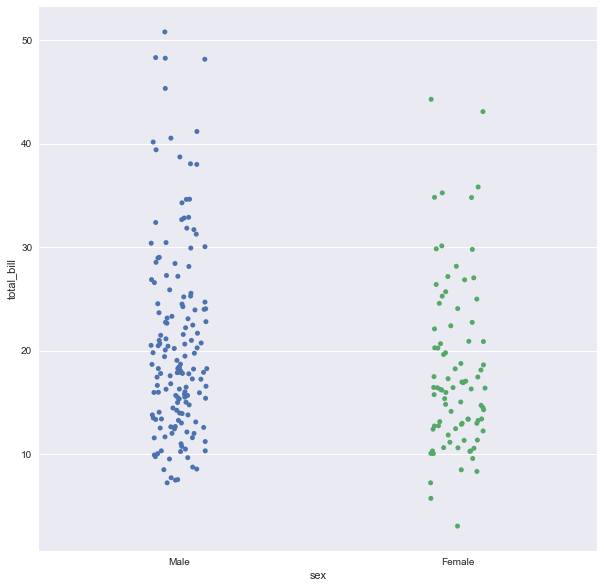

In [210]:
tips = seaborn.load_dataset("tips")
plt.figure(figsize=(10,10))
seaborn.stripplot(x="sex", y="total_bill", data=tips)
plt.show()